# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc = 'C:\Users\Junior\Desktop\EBAC1/SINASC_RO_2019.csv'

sinasc_raw = pd.read_csv(filepath_or_buffer=filepath)
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [5]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [7]:
print('Quantidade de linhas duplicadas:',
     sinasc_raw.duplicated().sum())

Quantidade de linhas duplicadas: 0


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [15]:
sinasc_raw.groupby(by='munResNome')[['IDADEMAE', 
                                     'IDADEPAI']].agg({'IDADEMAE':[('Média','mean')],
                                                       'IDADEPAI':[('Média','mean')]})

,IDADEMAE,IDADEPAI
,Média,Média
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [16]:
sinasc_raw.DTNASC = pd.to_datetime(sinasc_raw.DTNASC)
sinasc_raw.DTNASC

0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [17]:
sinasc_aniversario = sinasc_raw[(sinasc_raw.DTNASC.dt.day == 8) & 
                                (sinasc_raw.DTNASC.dt.month == 6)]

print('Em 2019, dos {} nascimentos registrados no Estado de Rondônia, {} ocorreram no dia 8 de junho.'.format(
    len(sinasc_raw), 
    len(sinasc_aniversario)
))

sinasc_aniversario = sinasc_aniversario.groupby(by=['DTNASC',
                                                    'SEXO',
                                                    'ESCMAE'])['PESO'].mean()

sinasc_aniversario = sinasc_aniversario.to_frame().reindex(labels=['1 a 3 anos', 
                                                                   '4 a 7 anos', 
                                                                   '8 a 11 anos', 
                                                                   '12 anos ou mais'], 
                                                           level='ESCMAE')

sinasc_aniversario

Em 2019, dos 27028 nascimentos registrados no Estado de Rondônia, 53 ocorreram no dia 8 de junho.


PESO
DTNASC     SEXO      ESCMAE                      
2019-06-08 Feminino  4 a 7 anos       3107.600000
                     8 a 11 anos      3052.000000
                     12 anos ou mais  3022.000000
           Masculino 1 a 3 anos       2795.000000
                     4 a 7 anos       3600.000000
                     8 a 11 anos      3331.052632
                     12 anos ou mais  3062.500000

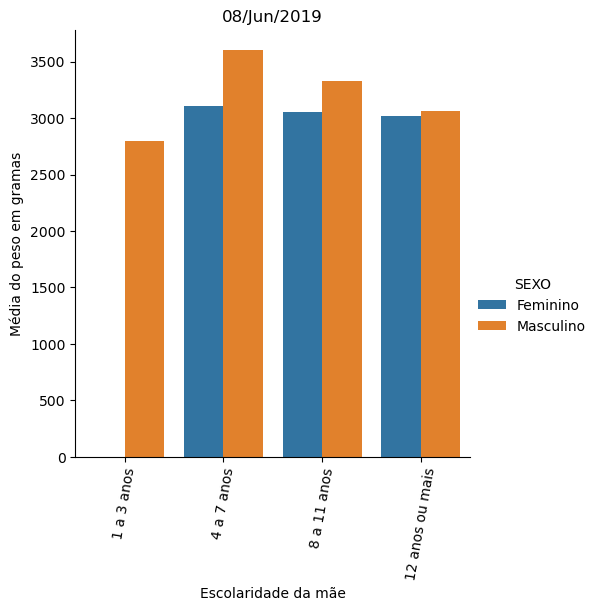

In [19]:
data = sinasc_aniversario.index.get_level_values(level=0).unique()[0].date()

sns.catplot(x='ESCMAE', 
            y='PESO', 
            data=sinasc_aniversario.reset_index(level='DTNASC', 
                                                drop=True).reset_index(), 
            hue='SEXO', 
            kind='bar', 
            order=['1 a 3 anos', 
                   '4 a 7 anos', 
                   '8 a 11 anos', 
                   '12 anos ou mais'])
plt.xticks(rotation=80)
plt.xlabel(xlabel='Escolaridade da mãe')
plt.ylabel(ylabel='Média do peso em gramas')
plt.title(label=data.strftime('%d/%b/%Y'));

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [20]:
print('Municípios em que nasceram menos bebês:\n')
print(sinasc_raw.munResNome.value_counts().sort_values().head())

sinasc_raw['COUNT'] = 1
sinasc_3 = sinasc_raw.groupby(by='munResNome')[['COUNT', 
                                                'IDADEMAE',
                                                'IDADEPAI']].agg(
    {'COUNT':[('Quantidade de bebês nascidos','count')], 
     'IDADEMAE':[('idade média','mean'), 
                 ('idade máxima',max), 
                 ('idade mínima',min)], 
     'IDADEPAI':[('idade média','mean'), 
                 ('idade máxima',max), 
                 ('idade mínima',min)]})

sinasc_3.sort_values(('COUNT', 'Quantidade de bebês nascidos'))

Municípios em que nasceram menos bebês:

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: munResNome, dtype: int64


COUNT    IDADEMAE  \
                          Quantidade de bebês nascidos idade média   
munResNome                                                           
Município ignorado - RO                              1   24.000000   
Castanheiras                                        32   27.281250   
Pimenteiras do Oeste                                40   25.075000   
Primavera de Rondônia                               43   27.023256   
Parecis                                             44   26.454545   
Rio Crespo                                          50   26.660000   
São Felipe D'Oeste                                  54   26.481481   
Teixeirópolis                                       64   26.031250   
Cacaulândia                                         75   25.546667   
Cabixi                                              80   26.037500   
Vale do Paraíso                                     81   25.679012   
Ministro Andreazza                                  84   27.904762   
Vale do Anari                                       93   26.096774   
Theobroma                                           97   25.536082   
Novo Horizonte do Oeste                             98   26.938776   
Santa Luzia D'Oeste                                 99   26.121212   
Nova União                                         104   26.894231   
Itapuã do Oeste                                    109   26.064220   
Governador Jorge Teixeira                          112   24.401786   
Corumbiara                                         127   24.716535   
Alto Alegre dos Parecis                            154   24.844156   
Chupinguaia                                        162   25.333333   
Mirante da Serra                                   164   26.304878   
Campo Novo de Rondônia                             166   24.825301   
Seringueiras                                       168   24.910714   
Urupá                                              170   26.688235   
Monte Negro                                        199   25.648241   
Cujubim                                            205   24.482927   
Alvorada D'Oeste                                   205   25.770732   
Colorado do Oeste                                  214   27.602804   
Alto Paraíso                                       226   24.960177   
Costa Marques                                      233   24.412017   
Cerejeiras                                         237   27.240506   
Nova Brasilândia D'Oeste                           261   26.222222   
São Francisco do Guaporé                           303   25.660066   
Presidente Médici                                  304   25.796053   
Candeias do Jamari                                 337   25.243323   
São Miguel do Guaporé                              353   25.926346   
Alta Floresta D'Oeste                              367   25.991826   
Nova Mamoré                                        432   25.326389   
Espigão D'Oeste                                    450   26.093333   
Machadinho D'Oeste                                 500   25.480000   
Buritis                                            583   25.559177   
Pimenta Bueno                                      616   25.199675   
Ouro Preto do Oeste                                631   26.375594   
Guajará-Mirim                                      781   25.462228   
Jaru                                               881   25.982974   
Rolim de Moura                                     927   26.600863   
Cacoal                                            1374   26.890102   
Vilhena                                           1590   26.433962   
Ariquemes                                         1729   25.607866   
Ji-Paraná                                         2182   26.361137   
Porto Velho                                       8437   26.312670   

                                                       IDADEPAI               \
                          idade máxima idade mín

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [21]:
sinasc_mar = sinasc_raw[sinasc_raw.DTNASC.dt.month == 3].copy()

print('O município que mais nasceu bebê no mês de março foi {} com {} nascimentos.'.format(
    sinasc_mar['munResNome'].value_counts().index[0], 
    sinasc_mar['munResNome'].value_counts().values[0]))

sinasc_mar['MES'] = sinasc_mar['DTNASC'].dt.month_name()
sinasc_mar['COUNT'] = 1
sinasc_4 = sinasc_mar.groupby(by=['MES',
                                  'munResNome']
                             )[['COUNT', 
                                'QTDFILVIVO',
                                'IDADEMAE',
                                'IDADEPAI']
                              ].agg({'COUNT':[('Qtd de bebês nascidos','count')], 
                                     'QTDFILVIVO':[('Média','mean'), 
                                                   ('Máx',max), 
                                                   ('Mín',min)], 
                                     'IDADEMAE':[('Média','mean'), 
                                                 ('Máx',max), 
                                                 ('Mín',min), 
                                                 ('Amplitude',lambda x: x.max()-x.min())], 
                                     'IDADEPAI':[('Média','mean'), 
                                                 ('Máx',max), 
                                                 ('Mín',min), 
                                                 ('Amplitude',lambda x: x.max()-x.min())]
                                    })

sinasc_4['Diferença da média IDADEPAI-IDADEMAE'] = sinasc_4[('IDADEPAI','Média')]-sinasc_4[('IDADEMAE','Média')]
sinasc_4.sort_values(('COUNT', 'Qtd de bebês nascidos'), 
                     ascending=False
                    )

O município que mais nasceu bebê no mês de março foi Porto Velho com 744 nascimentos.


COUNT QTDFILVIVO            \
                                Qtd de bebês nascidos      Média  Máx  Mín   
MES   munResNome                                                             
March Porto Velho                                 744   1.295056  9.0  0.0   
      Ji-Paraná                                   188   0.828877  4.0  0.0   
      Vilhena                                     148   0.979592  5.0  0.0   
      Ariquemes                                   141   1.064748  4.0  0.0   
      Cacoal                                      133   0.969697  7.0  0.0   
      Jaru                                         80   1.025641  5.0  0.0   
      Guajará-Mirim                                75   1.534247  8.0  0.0   
      Rolim de Moura                               69   0.724638  5.0  0.0   
      Ouro Preto do Oeste                          67   1.014925  5.0  0.0   
      Pimenta Bueno                                62   0.836066  4.0  0.0   
      Buritis                                      59   1.421053  4.0  0.0   
      Nova Mamoré                                  53   1.360000  6.0  0.0   
      Espigão D'Oeste                              44   1.386364  6.0  0.0   
      Machadinho D'Oeste                           44   1.000000  6.0  0.0   
      São Miguel do Guaporé                        41   1.000000  4.0  0.0   
      Candeias do Jamari                           33   1.250000  4.0  0.0   
      São Francisco do Guaporé                     31   1.161290  6.0  0.0   
      Alta Floresta D'Oeste                        31   0.903226  4.0  0.0   
      Presidente Médici                            29   0.724138  3.0  0.0   
      Costa Marques                                24   1.208333  4.0  0.0   
      Alvorada D'Oeste                             22   1.000000  3.0  0.0   
      Alto Paraíso                                 22   1.285714  3.0  0.0   
      Monte Negro                                  20   0.700000  3.0  0.0   
      Nova Brasilândia D'Oeste                     20   0.947368  3.0  0.0   
      Colorado do Oeste                            19   1.000000  4.0  0.0   
      Seringueiras                                 19   1.000000  2.0  0.0   
      Chupinguaia                                  18   1.055556  4.0  0.0   
      Cujubim                                      17   1.294118  5.0  0.0   
      Cerejeiras                                   16   0.875000  2.0  0.0   
      Urupá                                        14   0.928571  2.0  0.0   
      Vale do Paraíso                              13   0.583333  2.0  0.0   
      Campo Novo de Rondônia                       13   1.285714  2.0  0.0   
      Corumbiara                                   12   0.909091  3.0  0.0   
      Vale do Anari                                11   0.818182  2.0  0.0   
      Alto Alegre dos Parecis                      10   0.888889  2.0  0.0   
      Governador Jorge Teixeira                    10   0.555556  2.0  0.0   
      Cacaulândia                                  10   1.200000  4.0  0.0   
      Rio Crespo                                    9   1.000000  3.0  0.0   
      Mirante da Serra                              9   1.000000  2.0  0.0   
      Theobroma                                     8   1.125000  2.0  0.0   
      Itapuã do Oeste                               8   1.285714  3.0  0.0   
      Santa Luzia D'Oeste                           7   0.428571  2.0  0.0   
      Nova União                                    7   0.571429  1.0  0.0   
      Cabixi                                        6   0.833333  3.0  0.0   
      Parecis                                       6   1.833333  5.0  1.0   
      Ministro Andreazza                            6   1.166667  3.0  0.0   
      Pimenteiras do Oeste                          6   1.000000  2.0  0.0   
      Primavera de Rondônia                         5   1.200000  2.0  0.0   
      São Felipe D'Oeste                            5   0.000000  0.0 

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')